In [40]:
import pandas as pd  #Data manipulation
import seaborn as sns #Visualisations package

import matplotlib.pyplot as plt #Mathematic Visualisation
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #copy_slice_warning



# we read the data
df = pd.read_csv(r"listings.csv")

In [41]:
df.head(10)
# the first 10 of dataset 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,53,90,144,2021-11-02,2.08,4,326,10,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,92,147,2021-01-01,0.97,1,170,1,NaN
2,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2020-03-31,1.95,1,0,0,NaN
3,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.10,1,0,0,03/Z/RA/003410-18
4,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,95,26,2021-06-21,0.19,3,159,1,NaN
5,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,60,48,2017-12-14,0.34,2,230,0,NaN
6,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,44,92,297,2021-10-20,2.06,1,212,19,NaN
7,20858,Designer Loft in Berlin Mitte,71331,Marc,Pankow,Prenzlauer Berg Südwest,52.53711,13.40888,Entire home/apt,169,3,90,2021-11-17,0.80,1,161,4,Genehmigung BA Pankow 03/Z/ZA/002715-17 Genehi...
8,21869,Studio in the Heart of Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50460,13.43374,Entire home/apt,70,60,60,2016-06-05,0.44,2,199,0,NaN
9,22438,WOHNUNG IN BERLIN ★ MITTE,86159,Javier,Mitte,Brunnenstr. Süd,52.53408,13.38871,Entire home/apt,65,90,181,2020-11-30,1.39,1,170,0,NaN


In [42]:
#data type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [43]:
#drop unnecesary column 
df = df.drop(['license','host_id','host_name','name','last_review','reviews_per_month','longitude','latitude','number_of_reviews_ltm'], 1)


In [44]:
df.head(10)

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2015,Mitte,Brunnenstr. Süd,Entire home/apt,53,90,144,4,326
1,3176,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,92,147,1,170
2,7071,Pankow,Helmholtzplatz,Private room,33,1,293,1,0
3,9991,Pankow,Prenzlauer Berg Südwest,Entire home/apt,180,6,8,1,0
4,14325,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70,95,26,3,159
5,16644,Friedrichshain-Kreuzberg,nördliche Luisenstadt,Entire home/apt,90,60,48,2,230
6,17904,Neukölln,Reuterstraße,Entire home/apt,44,92,297,1,212
7,20858,Pankow,Prenzlauer Berg Südwest,Entire home/apt,169,3,90,1,161
8,21869,Friedrichshain-Kreuzberg,nördliche Luisenstadt,Entire home/apt,70,60,60,2,199
9,22438,Mitte,Brunnenstr. Süd,Entire home/apt,65,90,181,1,170


In [45]:
df.rename(columns = {'neighbourhood_group':'the_place', 'neighbourhood 	':'the_adress', }, inplace = True)

In [46]:
df.head(10)

,id,the_place,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2015,Mitte,Brunnenstr. Süd,Entire home/apt,53,90,144,4,326
1,3176,Pankow,Prenzlauer Berg Südwest,Entire home/apt,90,92,147,1,170
2,7071,Pankow,Helmholtzplatz,Private room,33,1,293,1,0
3,9991,Pankow,Prenzlauer Berg Südwest,Entire home/apt,180,6,8,1,0
4,14325,Pankow,Prenzlauer Berg Nordwest,Entire home/apt,70,95,26,3,159
5,16644,Friedrichshain-Kreuzberg,nördliche Luisenstadt,Entire home/apt,90,60,48,2,230
6,17904,Neukölln,Reuterstraße,Entire home/apt,44,92,297,1,212
7,20858,Pankow,Prenzlauer Berg Südwest,Entire home/apt,169,3,90,1,161
8,21869,Friedrichshain-Kreuzberg,nördliche Luisenstadt,Entire home/apt,70,60,60,2,199
9,22438,Mitte,Brunnenstr. Süd,Entire home/apt,65,90,181,1,170


In [47]:
#order the data 
df.sort_values(by=['the_place'], inplace=False, ascending=False)

,id,the_place,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
295,523052,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,Entire home/apt,59,3,14,1,212
465,856117,Treptow - Köpenick,Oberschöneweide,Private room,20,3,9,4,122
305,542316,Treptow - Köpenick,Schmöckwitz/Karolinenhof/Rauchfangswerder,Entire home/apt,99,2,2,4,0
181,266086,Treptow - Köpenick,Baumschulenweg,Entire home/apt,85,3,9,1,230
309,555352,Treptow - Köpenick,Schmöckwitz/Karolinenhof/Rauchfangswerder,Entire home/apt,60,2,1,4,0
...,...,...,...,...,...,...,...,...,...
63,159454,Charlottenburg-Wilm.,Wiesbadener Straße,Entire home/apt,161,2,77,1,77
307,545037,Charlottenburg-Wilm.,Neue Kantstraße,Entire home/apt,73,60,4,1,76
267,473386,Charlottenburg-Wilm.,Düsseldorfer Straße,Entire home/apt,100,4,98,1,61
49,103644,Charlottenburg-Wilm.,Halensee,Entire home/apt,40,70,32,3,169


In [48]:
#looking the price vs the places and room type, ordered by the price and place
df[['the_place', 'price', 'room_type']].sort_values(by=['the_place','price'], inplace=False, ascending=False)


,the_place,price,room_type
305,Treptow - Köpenick,99,Entire home/apt
181,Treptow - Köpenick,85,Entire home/apt
138,Treptow - Köpenick,68,Entire home/apt
309,Treptow - Köpenick,60,Entire home/apt
295,Treptow - Köpenick,59,Entire home/apt
...,...,...,...
225,Charlottenburg-Wilm.,31,Private room
193,Charlottenburg-Wilm.,29,Private room
260,Charlottenburg-Wilm.,28,Entire home/apt
18,Charlottenburg-Wilm.,27,Entire home/apt


In [49]:
# get the minimum of price ,ordered by the place
df.groupby("the_place").agg({'price':['min']})

,price
,min
the_place,
Charlottenburg-Wilm.,27
Friedrichshain-Kreuzberg,20
Lichtenberg,36
Marzahn - Hellersdorf,30
Mitte,19
Neukölln,17
Pankow,20
Reinickendorf,21


In [50]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.002076,-0.019669,-0.110590,-0.166504,-0.033257
price,0.002076,1.000000,-0.097346,-0.016285,-0.042726,0.140920
minimum_nights,-0.019669,-0.097346,1.000000,-0.117447,0.025467,0.069964
number_of_reviews,-0.110590,-0.016285,-0.117447,1.000000,0.090557,0.171776
calculated_host_listings_count,-0.166504,-0.042726,0.025467,0.090557,1.000000,0.269817
availability_365,-0.033257,0.140920,0.069964,0.171776,0.269817,1.000000


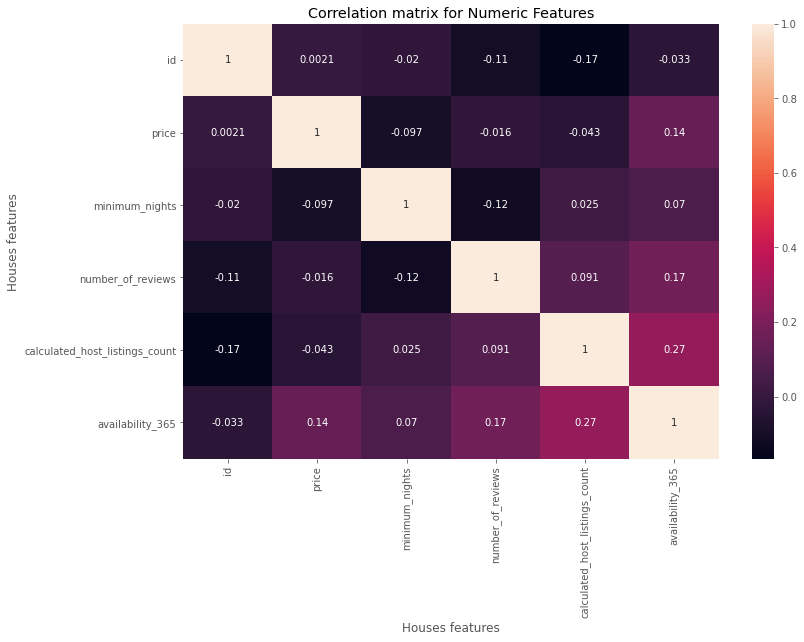

In [51]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Houses features")

plt.ylabel("Houses features")

plt.show()

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='availability_365'>

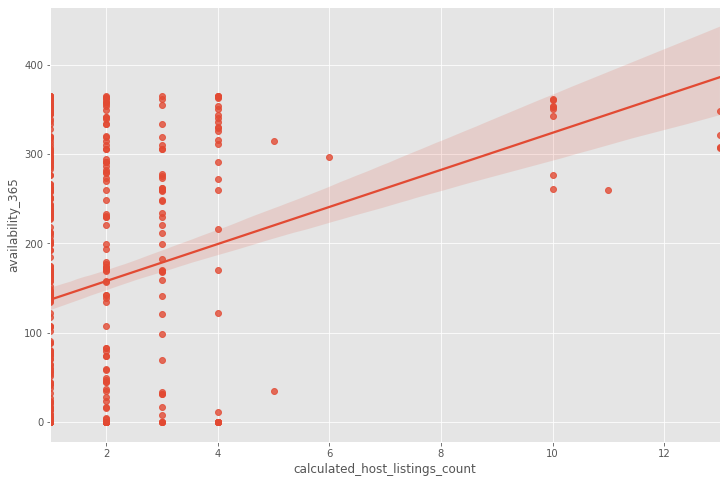

In [52]:
sns.regplot(x="calculated_host_listings_count", y="availability_365", data=df)